# **`Awake vs Drowsy - Object Detection`**

In [1]:
import torch
import uuid
import time
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Try and detect an image
img = 'https://www.telegraph.co.uk/content/dam/news/2023/01/15/TELEMMGLPICT000322063156_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQf0Rf_Wk3V23H2268P_XkPxc.jpeg?imwidth=1280' 

results = model(img)
print(results)

%matplotlib inline
plt.imshow(np.squeeze(results.render()))

plt.show()

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()

### **`Gathering Images`**

In [4]:
# Train a model from scratch with custom images and labels

img_path = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
num_imgs = 30

In [4]:
cap = cv2.VideoCapture(0)

# Loop through the labels
for label in labels:
    print('Collecting images for: {}'.format(label))
    time.sleep(5)

    # Looping through images (num_imgs)
    for image in range(num_imgs):
        print('Collecting images for {}, image number {}'.format(label, image))

        # Webcam on
        ret, frame = cap.read()

        # Image path
        imgname = os.path.join(img_path, label+'.'+str(uuid.uuid1())+'.jpg')

        # writing out img to file
        cv2.imwrite(imgname, frame)

        # Render to screen
        cv2.imshow('Image Collection', frame)

        time.sleep(2) # adding a slight delay so that we can take different shots

        if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
            break

cap.release()
cv2.destroyAllWindows()

: 

In [ ]:
for label in labels:
    print('Collecting images for: {}'.format(label))
    for image in range(num_imgs):
        print('Collecting images for {}, image number {}'.format(label, image))

### **`Labelling Images`**

In [6]:
os.getcwd()

'/Users/oscaramirmansour/Pytorch'

In [9]:
# Labelimg labeling repo
!git clone https://github.com/HumanSignal/labelImg.git

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [10]:
# Installing other dependencies
!pip3 install pyqt5 lxml --upgrade
!cd labelimg && pyrcc5 -o resources.py resources.qrc

### **`Training On Newly Labelled Images`**

Changing directory into the YOLOv5 folder and executing the training file on image size of 320, batch size of 16 and 5 epochs and we'll be training on the yolov5 model using Pytorch weights.

We'll be training on the dataset.yaml file.

In [3]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.11.6 torch-2.1.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

### **`Loading Custom Trained Model`**

In [3]:
model_2 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [8]:
img_2 = os.path.join('data', 'images', 'awake.618c936e-8a54-11ee-b275-784f434cfd22.jpg')

In [11]:
results = model_2(img_2)

In [12]:
print(results)

image 1/1: 720x1280 1 awake
Speed: 74.0ms pre-process, 504.5ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


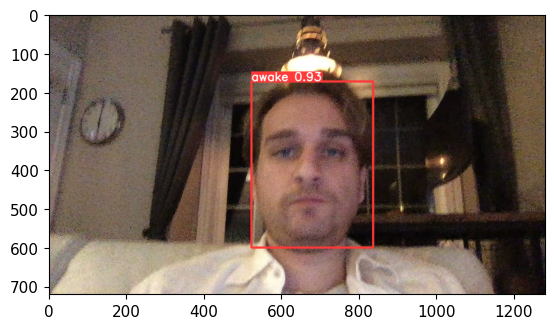

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
img_3 = os.path.join('data', 'images', 'drowsy.98349d1c-8a54-11ee-b275-784f434cfd22.jpg')

In [16]:
results = model_2(img_3)

In [17]:
print(results)

image 1/1: 720x1280 1 drowsy
Speed: 61.1ms pre-process, 688.7ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


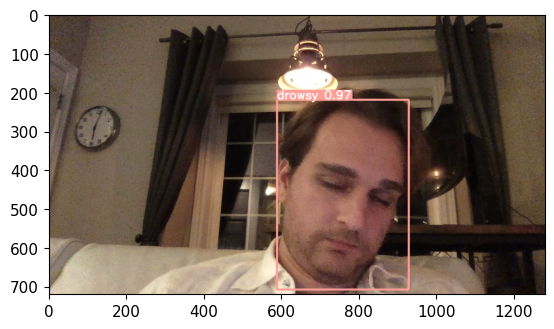

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model_2(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        breakqqq

cap.release()
cv2.destroyAllWindows()